Importing diabetes dataset

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
rawdata = pd.read_csv(url, names=names)


Getting top 10 rows of dataset

In [2]:
rawdata.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Getting dimensions of dataset

In [3]:
rawdata.shape

(768, 9)

##**R1**

Checking for null values in dataset

In [4]:
rawdata.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Extracting statistical data for each column

In [5]:
rawdata.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Since the following rows : Glucose, BloodPressure, SkinThickness, Insulin, BMI have minimum value 0 which is practically not possible. Hence, replacing all such value with NaN                       


In [6]:
import numpy as np
rawdata.iloc[:,1:6]=rawdata.iloc[:,1:6].replace(0,np.nan)

Calculating how many null values are present in each column

In [7]:
rawdata.isnull().sum()

preg       0
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64

Replacing the above null values with the mean of their respective columns

In [8]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(rawdata.values)
imputed_data = imr.transform(rawdata.values)
df = pd.DataFrame(imputed_data, columns=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])

print(df)


     preg   plas  pres      skin        test  mass   pedi   age  class
0     6.0  148.0  72.0  35.00000  155.548223  33.6  0.627  50.0    1.0
1     1.0   85.0  66.0  29.00000  155.548223  26.6  0.351  31.0    0.0
2     8.0  183.0  64.0  29.15342  155.548223  23.3  0.672  32.0    1.0
3     1.0   89.0  66.0  23.00000   94.000000  28.1  0.167  21.0    0.0
4     0.0  137.0  40.0  35.00000  168.000000  43.1  2.288  33.0    1.0
..    ...    ...   ...       ...         ...   ...    ...   ...    ...
763  10.0  101.0  76.0  48.00000  180.000000  32.9  0.171  63.0    0.0
764   2.0  122.0  70.0  27.00000  155.548223  36.8  0.340  27.0    0.0
765   5.0  121.0  72.0  23.00000  112.000000  26.2  0.245  30.0    0.0
766   1.0  126.0  60.0  29.15342  155.548223  30.1  0.349  47.0    1.0
767   1.0   93.0  70.0  31.00000  155.548223  30.4  0.315  23.0    0.0

[768 rows x 9 columns]


Again having a look at the count of null values

In [9]:
df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Making sure now statistics are fine

In [10]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Splitting datatset into 2 sets: one for training(60%) and other(40%) for testing+validation

In [11]:
from sklearn.model_selection import train_test_split
y=df.iloc[:,8:9]
x=df.iloc[:,0:8]
X_train, X_test_val, y_train, y_test_val = train_test_split(x,y, test_size=0.4, random_state=42)

Splitting validation+Testing into separate sets

In [12]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val,y_test_val, test_size=0.5, random_state=42)

Checking the shape of train,test and validate datasets

In [13]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)


(460, 8)
(154, 8)
(154, 8)
(460, 1)
(154, 1)
(154, 1)


Using MinMaxScalar to normalise train,test and validate dataset

In [14]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
X_val_norm = mms.transform(X_val)

##**R2**

Generating a linear perceptron model and deploying it on Test partition

In [15]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Perceptron(random_state=42)

Displaying F measure values for each class

In [16]:
from sklearn.metrics import accuracy_score

y_pred = p.predict(X_train_norm)
from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_pred,average=None)
print(f1)

[0.82574568 0.60777385]


##**R3**

Checking count of each class in the dataset

In [17]:
from collections import Counter
Counter(y_train['class'].values)

Counter({0.0: 294, 1.0: 166})

Applying SMOTE on the above unbalanced dataset

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42,sampling_strategy=1.0,k_neighbors=5)

X_resampled, y_resampled = smote.fit_resample(X_train_norm, y_train)
Counter(y_resampled['class'].values)


Counter({0.0: 294, 1.0: 294})

Generating perceptron on the above oversampled training dataset

In [19]:
q = Perceptron(random_state=42)
q.fit(X_resampled, y_resampled)
y_pred = q.predict(X_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Getting F measure for each of the classes

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(y_resampled, y_pred,average=None)
print(f1)

[0.75091575 0.78412698]


##**R4**

Initially there was an evident difference in the F values of minority class and majority class. Since the dataset was unbalanced, majority class's F value was high than the minority class. So the model was more biased towards the majority class giving a high F value. Later on, after oversampling the dataset using SMOTE the F values of both the classes were comparatively same differing a bit. The model is now able to predict both the classes with approx same efficiency since the dataset is balanced now.

This results in a more equitable performance between the majority and minority classes, reducing bias towards the majority class and creating a more balanced and robust model.

##**R5**

In order to determine which features are least significant we need to observe the coefficients (weights) assigned to each feature from the trained perceptron model. The two features with the smallest absolute coefficients are likely to be the least significant predictors.
The two least significant predictors have the lowest absolute coefficients, suggesting weaker correlations with the target variable and less impact on the model's predictions. It might be possibly because of their weaker correlations or overlap with other features.

In [21]:
print("Coefficients are" ,q.coef_)

Coefficients are [[ 1.60963557  4.99733486 -0.73441111 -0.55453972  0.81210663  4.40681226
   0.38078465  0.58411857]]


Finding least significant predictors

In [22]:
coefficients = q.coef_[0]
feature_names = np.array(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'])

# Identify the two least significant predictors
least_significant_indices = np.argsort(np.abs(coefficients))[:2]
least_significant_features = feature_names[least_significant_indices]
print(least_significant_features)
print(least_significant_indices)

['pedi' 'skin']
[6 3]


Least significant predictors are 'pedi' (DiabetesPedigreeFunction) and 'skin' (SkinThickness)

Dropping the least significant features and regenerating the linear perceptron model to display the F values on the two classes.


In [23]:
X_new = np.delete( X_resampled,[6,3], axis=1)

model_reduced = Perceptron(random_state=42)
model_reduced.fit(X_new, y_resampled)

y_pred = model_reduced.predict(X_new)
from sklearn.metrics import f1_score
f1 = f1_score(y_resampled, y_pred,average=None)
print(f1)


[0.74115456 0.78247261]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix for the results

[[199  95]
 [ 44 250]]


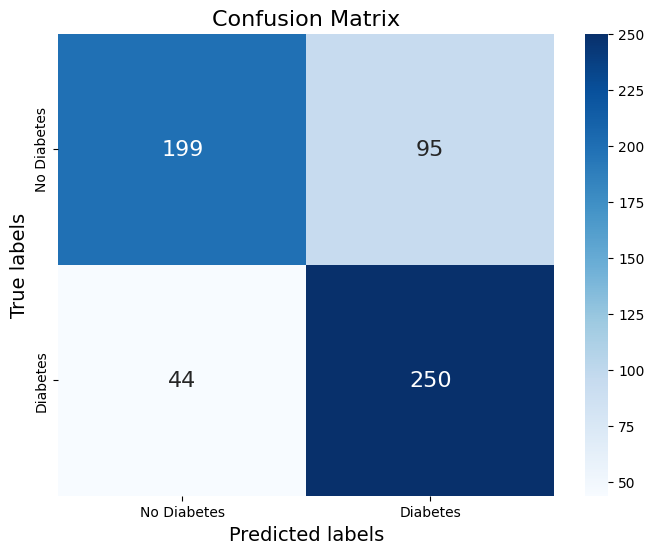

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_resampled, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', annot_kws={"size": 16},xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'])
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

##**R6**

 Identifying the two most significant predictors, we observe the coefficients (weights) assigned to each feature from the trained perceptron model. The two features with the highest absolute coefficients are likely to be the most significant predictors.
The two most significant predictors have the largest absolute coefficients, suggesting stronger correlations with the target variable and more impact on the model's predictions.


In [25]:
print("Model coeff ",model_reduced.coef_)

Model coeff  [[ 2.12027264e+00  3.61297921e+00 -1.28907107e+00  6.43798927e-04
   3.38186258e+00  1.55174076e+00]]


In [26]:
coefficients = model_reduced.coef_[0]
feature_names = np.array(['preg', 'plas', 'pres', 'test', 'mass', 'age'])

# Identify the two least significant predictors
most_significant_indices = np.argsort(np.abs(coefficients))[::-1][:2]
most_significant_features = feature_names[most_significant_indices]

# Print the two most significant features
print("The two most significant predictors are:", most_significant_features)
print(most_significant_indices)

The two most significant predictors are: ['plas' 'mass']
[1 4]


The two most significant predictors are 'plas' (Glucose) and 'mass'(BMI)

##**R7**

In [27]:
import warnings
warnings.filterwarnings("ignore")

Finding the optimal combination of oversampling ratio (or) and n values

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score

# Define the parameter grid for grid search
param_grid = {
    'sampling_strategy': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'k_neighbors': list(range(1, 21))
}

# Initialize lists to store results
f1_scores = []
smote_params_list = []

# Loop through each combination of SMOTE parameters
for sampling_strategy in param_grid['sampling_strategy']:
    for k_neighbors in param_grid['k_neighbors']:
        # Create SMOTE resampler
        smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=42)

        # Resample the training set
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train_norm, y_train)

        # Initialize and train Perceptron model
        perceptron = Perceptron()
        perceptron.fit(X_train_resampled, y_train_resampled)

        # Predict on the validation set
        y_pred_val = perceptron.predict(X_val_norm)

        # Calculate F1 score on the validation set
        f1 = f1_score(y_val, y_pred_val, average='macro')

        # Store the F1 score and corresponding SMOTE parameters
        f1_scores.append(f1)
        smote_params_list.append({'sampling_strategy': sampling_strategy, 'k_neighbors': k_neighbors})

# Find the index of the best F1 score
best_f1_index = np.argmax(f1_scores)
best_f1_score = f1_scores[best_f1_index]
best_smote_params = smote_params_list[best_f1_index]

print("Best F1 score on validation set:", best_f1_score)
print("Corresponding SMOTE parameters:", best_smote_params)


Best F1 score on validation set: 0.7739048070092351
Corresponding SMOTE parameters: {'sampling_strategy': 0.7, 'k_neighbors': 17}


In [67]:
smote = SMOTE(random_state=42,sampling_strategy=0.7,k_neighbors=17)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_norm, y_train)
Counter(y_train_resampled['class'].values)


Counter({0.0: 294, 1.0: 205})

Again retraining the model

In [68]:
X_train_new = np.delete( X_train_resampled,[6,3], axis=1)
q = Perceptron(random_state=42)
q.fit(X_train_new, y_train_resampled)
y_train_pred = q.predict(X_train_new)
f1 = f1_score(y_train_resampled, y_train_pred,average=None)
print(f1)

[0.76404494 0.72844828]


  Testing on validation dataset

In [69]:
X_val_new = np.delete( X_val_norm,[6,3], axis=1)
y_val_pred = q.predict(X_val_new)
from sklearn.metrics import f1_score
f1 = f1_score(y_val, y_val_pred, average=None)
print(f1)

[0.73863636 0.65151515]


Testing on test dataset

In [70]:
X_test_new = np.delete( X_test_norm,[6,3], axis=1)
y_test_pred = q.predict(X_test_new)
f1 = f1_score(y_test, y_test_pred,average=None)
print(f1)

[0.74860335 0.65116279]
